In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Darjeeling.csv')

In [3]:
df.columns

Index(['landslide', 'month(in no.)', 'month', 'year', 'rainfall', 'earthquake',
       'elevation', 'count'],
      dtype='object')

In [4]:
# Dropping Irrelevant Variables
df = df.drop(['elevation','year','month','count'],axis = 1)

In [5]:
df.columns

Index(['landslide', 'month(in no.)', 'rainfall', 'earthquake'], dtype='object')

In [6]:
df.tail()

,landslide,month(in no.),rainfall,earthquake
163,1.0,8,644.0,3.8
164,1.0,9,827.0,6.5
165,NaN,10,91.2,3.6
166,NaN,11,1.8,0.0
167,NaN,12,2.8,0.0


In [7]:
# Checking Null values in Dataset
df.isnull().sum()

landslide        102
month(in no.)      0
rainfall           0
earthquake         0
dtype: int64

In [8]:
# Replacing null values with 0 
df['landslide'] = df['landslide'].fillna(0)
df['month(in no.)'] = df['month(in no.)'].fillna(0)
df['rainfall'] = df['rainfall'].fillna(0)
df['earthquake'] = df['earthquake'].fillna(0)
#df['count'] = df['count'].fillna(0)

In [9]:
import numpy as np
np.count_nonzero(df['landslide'])

66

In [10]:
## Encoding Function for Cyclic Variable ( Month )
# def encode(data, col, max_val):
#     data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
#     data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
#     return data

In [11]:
#data = encode(df, 'month(in no)', 12)

In [12]:
#data.head()

In [13]:
 # Doing One - Hot encoding on 'Month' variable
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
hm = enc.fit_transform(np.array(df['month(in no.)']).reshape(-1,1))

In [14]:
hm.shape

(168, 12)

In [15]:
df[enc.categories_[0]] = hm.toarray()

In [16]:
df.drop('month(in no.)',axis = 1 , inplace = True)

In [17]:
df.head()

,landslide,rainfall,earthquake,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,3.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,81.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,46.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,160.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,215.1,4.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.preprocessing import MinMaxScaler
# feature_range=(0,3)
scaler=MinMaxScaler()
df1=scaler.fit_transform((df.iloc[:,[1,2]]))
df_2 = pd.DataFrame(df1)
df_final = pd.concat([df.iloc[:,[0,3,4,5,6,7,8,9,10,11,12,13,14]],df_2],axis=1)

In [19]:
df_final.head()

,landslide,1,2,3,4,5,6,7,8,9,10,11,12,0,1
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002899,0.000000
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075851,0.000000
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043584,0.000000
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.149738,0.000000
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201178,0.646154


In [20]:
from sklearn.model_selection import train_test_split
X = df_final.iloc[:,1:]
y = df_final.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33, random_state=42)

In [21]:
## Balancing the Dataset

# from imblearn.over_sampling import SMOTE
# from collections import Counter
# over_sampler = SMOTE(k_neighbors=3)
# X_res, y_res = over_sampler.fit_resample(X_train, y_train)
# print(f"Training target statistics: {Counter(y_res)}")
# print(f"Testing target statistics: {Counter(y_test)}")

In [22]:
# #reshape inputs to [samples,time steps,features] which is required for LSTM
# X_train=X_res.reshape(X_res.shape[0],X_res.shape[1],1)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# LSTM

In [65]:
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

In [66]:
#reshape inputs to [samples,time steps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [67]:
#create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import SGD

LSTM + CNN 

In [72]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(2,1)))
#model.add(Conv1D(filters=10, kernel_size=1, padding='same', activation='tanh'))
#model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.2))
model.add(LSTM(50 , return_sequences=True)) # stacked LSTM model
model.add(Dropout(0.2))
model.add(LSTM(50)) # one more layer
#model.add(Dense(1)) # added final output 
model.add(Dense(1, activation='sigmoid'))	
#opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [74]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_binary_accuracy", 
                                        mode ="max", patience = 900, 
                                        restore_best_weights = True)
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,batch_size=56,verbose=1,callbacks =[earlystopping],shuffle=False)

Epoch 1/1000
2/2 [==============================] - 0s 339ms/step - loss: 0.6647 - binary_accuracy: 0.6071 - val_loss: 0.6611 - val_binary_accuracy: 0.6071
Epoch 2/1000
2/2 [==============================] - 0s 172ms/step - loss: 0.6644 - binary_accuracy: 0.6071 - val_loss: 0.6592 - val_binary_accuracy: 0.6071
Epoch 3/1000
2/2 [==============================] - 0s 163ms/step - loss: 0.6631 - binary_accuracy: 0.6071 - val_loss: 0.6574 - val_binary_accuracy: 0.6071
Epoch 4/1000
2/2 [==============================] - 0s 163ms/step - loss: 0.6607 - binary_accuracy: 0.6071 - val_loss: 0.6551 - val_binary_accuracy: 0.6071
Epoch 5/1000
2/2 [==============================] - 0s 99ms/step - loss: 0.6583 - binary_accuracy: 0.6071 - val_loss: 0.6516 - val_binary_accuracy: 0.6071
Epoch 6/1000
2/2 [==============================] - 0s 141ms/step - loss: 0.6550 - binary_accuracy: 0.6071 - val_loss: 0.6466 - val_binary_accuracy: 0.6071
Epoch 7/1000
2/2 [==============================] - 0s 48ms/step 

In [75]:
scores = model.evaluate(X_train, y_train, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

4/4 [==============================] - 4s 13ms/step - loss: 0.2973 - binary_accuracy: 0.8929
Accuracy: 89.29%


In [76]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

2/2 [==============================] - 0s 14ms/step - loss: 0.2789 - binary_accuracy: 0.9821
Accuracy: 98.21%


In [77]:
y_pred = model.predict(X_test)

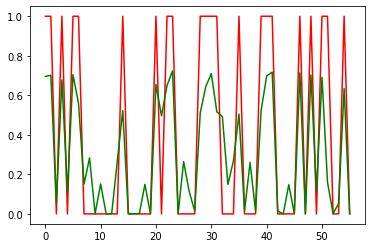

In [78]:
import matplotlib.pyplot as plt
plt.plot(y_test,c='r')
plt.plot(y_pred,c='g') 
plt.show()

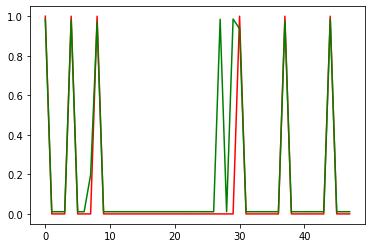

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test,c='r')
plt.plot(y_pred,c='g') 
plt.show()

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# class_weight='balanced',
logreg = LogisticRegression(C =50 , n_jobs=-1,random_state=42,max_iter=10,solver = 'newton-cg')
# X_res, y_res
logreg.fit(X_train, y_train)

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [49]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.96
Accuracy of logistic regression classifier on train set: 0.94


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[34  0]
 [ 2 20]]


In [33]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','10']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.903333 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.902500 (0.085002) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.902500 (0.085002) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.901667 (0.084448) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': '10', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': '10', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': '10', 'solver': 'liblinear'}
0.903333 (0.083389) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.903333 (0.083389) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.901667 (0.085576) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': '10', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': '10', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 10, 'penalty': '10', 'solver': 'liblinear'}
0.897197 (0.082449) with: {

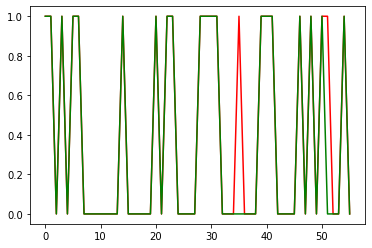

In [51]:
import matplotlib.pyplot as plt
plt.plot(y_test,c='r')
plt.plot(y_pred,c='g') 
plt.show()

# LSTM 2

In [ ]:
#n_features = x_train.shape[2]
model = Sequential()

model.add(LSTM(32, activation = 'tanh',return_sequences = False, input_shape = (2,1)))

#model.add(LSTM(16, activation = 'tanh',return_sequences = False))
#model.add(Dropout(0.3))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
#model.add(Dropout(0.3))
model.add(Dense(1,activation = 'tanh'))
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics='accuracy')


In [ ]:
history = model.fit(X_train, y_train, epochs = 128, batch_size = 5, verbose = 1, shuffle = False)
y_pred = model.predict(X_test)
scores = model.evaluate(X_test, y_test, verbose=1)


In [ ]:
scores

[1.9281185865402222, 0.875]

# SVC

In [57]:
##SVC
from sklearn import svm
#'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'
clf = svm.SVC(kernel='rbf',gamma = 'scale',C = 50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
print('accuracy score:',clf.score(X_train,y_train))
print('accuracy score:',clf.score(X_test,y_test))

accuracy score: 0.9464285714285714
accuracy score: 0.9464285714285714


In [53]:
# Hyperparameter tuning SVM 
#model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.916414 using {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.916414 (0.072729) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.901515 (0.084428) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.842172 (0.122266) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.907576 (0.081439) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.898485 (0.085723) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.878030 (0.108844) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.904545 (0.086257) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.904545 (0.086257) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.907828 (0.091037) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.856818 (0.097103) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.771717 (0.087842) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.871717 (0.088929) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.607576 (0.037237) with: {'C': 0.01, 'gamma': 'scale',

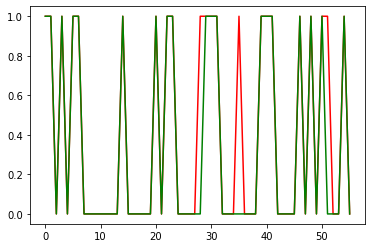

In [58]:
import matplotlib.pyplot as plt
plt.plot(y_test,c='r')
plt.plot(y_pred,c='g') 
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=0,class_weight='balanced')

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

In [ ]:
y_pred = dt.predict(X_test)
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'.format(dt.score(X_test, y_test)))
print('Accuracy of Gradient Boosting classifier on train set: {:.2f}'.format(dt.score(X_train, y_train)))

Accuracy of Gradient Boosting classifier on test set: 0.89
Accuracy of Gradient Boosting classifier on train set: 1.00


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','10']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=dt, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

# Random Forest Classifier

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=0,class_weight='balanced')

#Ensemble Methods

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier

gb=GradientBoostingClassifier(random_state=0)
#bc=BaggingClassifier(base_estimator=knn,random_state=0)

import lightgbm as lgb
lgbm=lgb.LGBMClassifier(random_state=0)

from xgboost import XGBClassifier
classifier = XGBClassifier()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
#print('accuracy score:',accuracy_score(y_test,y_pred))
print(classifier.score(X_train,y_train))

0.9642857142857143


#Stacking Classifier

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [ ]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_test, y_test)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.848 (0.111)
>knn 0.906 (0.095)
>cart 0.884 (0.085)
>svm 0.871 (0.101)
>bayes 0.853 (0.101)
>stacking 0.874 (0.095)


# Gradient Boosting Classifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbm_clf=GradientBoostingClassifier(n_estimators=100,learning_rate=1,random_state=0,max_features=3, max_depth = 1)
gbm_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='deviance', max_depth=1,
                           max_features=3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [64]:
y_pred = gbm_clf.predict(X_test)
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'.format(gbm_clf.score(X_test, y_test)))
print('Accuracy of Gradient Boosting classifier on train set: {:.2f}'.format(gbm_clf.score(X_train, y_train)))

Accuracy of Gradient Boosting classifier on test set: 0.96
Accuracy of Gradient Boosting classifier on train set: 0.98


In [62]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_features=3, max_depth = 1, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.938
Accuracy score (validation): 0.982
Learning rate:  0.1
Accuracy score (training): 0.938
Accuracy score (validation): 0.982
Learning rate:  0.25
Accuracy score (training): 0.955
Accuracy score (validation): 0.946
Learning rate:  0.5
Accuracy score (training): 0.955
Accuracy score (validation): 0.946
Learning rate:  0.75
Accuracy score (training): 0.964
Accuracy score (validation): 0.946
Learning rate:  1
Accuracy score (training): 0.982
Accuracy score (validation): 0.964


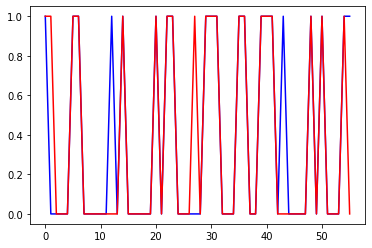

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test,c='b')
plt.plot(y_pred,c='r') 
plt.show()